# Earning by College Major

In my first (small) foray into analysis with actual visualization using pandas and matplotlib, I'll take a look at earnings based on college majors from a FiveThirtyEight dataset, original data from the American Community Survey.

First, just a bit of descriptives and cleaning

In [4]:
import pandas as pd
import matplotlib as plt 
%matplotlib inline

# Bring in the dataset and take a quick peak at its structure
recent_grads = pd.read_csv('recent-grads.csv')
# Get the first row as a table
recent_grads.iloc[0]




Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [6]:
# Get the first five rows
recent_grads.head()



,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
# Get the last five rows
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [8]:
# Descriptives for each of the columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [11]:
# Need to drop all the missing data rows
# How many rows in the data before we drop NAs?
raw_data_count = len(recent_grads)
print(raw_data_count)

# This drops every row containing a missing value; listwise deletion
recent_grads = recent_grads.dropna()

# How many rows in the data now?
# We only dropped one row as a result of listwise deletion
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172
172


## Scatter Plots

Generating a couple scatter plots to visualize a few relationships.

Text(0,0.5,u'Median Salary')

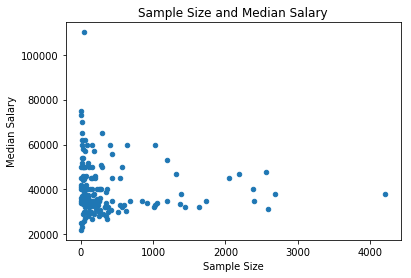

In [12]:
# Generating some scatter plots!
ss_med = recent_grads.plot(x = 'Sample_size', y = 'Median',
                 kind = 'scatter')
ss_med.set_title('Sample Size and Median Salary')
ss_med.set_xlabel('Sample Size')
ss_med.set_ylabel('Median Salary')


Text(0,0.5,u'Unemployment Rate')

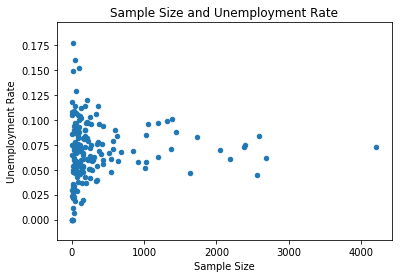

In [13]:
ss_ur = recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate',
                 kind = 'scatter')
ss_ur.set_title('Sample Size and Unemployment Rate')
ss_ur.set_xlabel('Sample Size')
ss_ur.set_ylabel('Unemployment Rate')

Text(0,0.5,u'Median Salary')

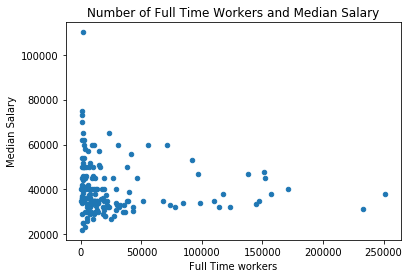

In [14]:
ft_med = recent_grads.plot(x = 'Full_time', y = 'Median',
                 kind = 'scatter')
ft_med.set_title('Number of Full Time Workers and Median Salary')
ft_med.set_xlabel('Full Time workers')
ft_med.set_ylabel('Median Salary')

Text(0,0.5,u'Median Salary')

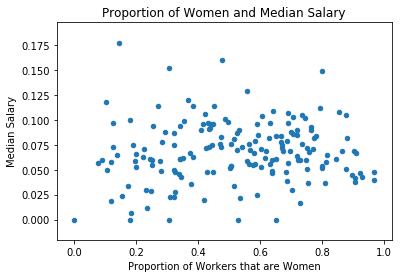

In [15]:
sw_ur = recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate',
                 kind = 'scatter')
sw_ur.set_title('Proportion of Women and Median Salary')
sw_ur.set_xlabel('Proportion of Workers that are Women')
sw_ur.set_ylabel('Median Salary')

Text(0,0.5,u'Median Salary')

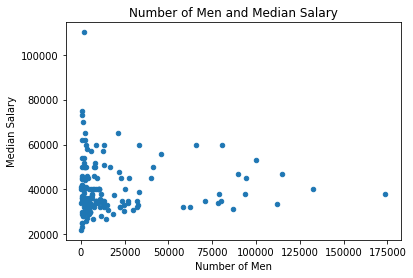

In [16]:
men_med = recent_grads.plot(x = 'Men', y = 'Median',
                 kind = 'scatter')
men_med.set_title('Number of Men and Median Salary')
men_med.set_xlabel('Number of Men')
men_med.set_ylabel('Median Salary')

Text(0,0.5,u'Median Salary')

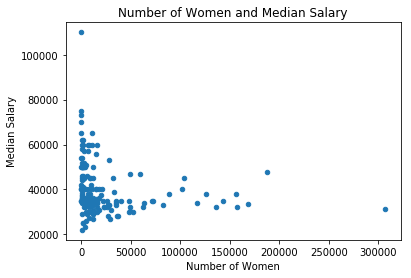

In [17]:
women_med = recent_grads.plot(x = 'Women', y = 'Median',
                 kind = 'scatter')
women_med.set_title('Number of Women and Median Salary')
women_med.set_xlabel('Number of Women')
women_med.set_ylabel('Median Salary')

## What do that series of scatter plots show?

The above scatter plots are meant to visualize a handful of relationships. 

The first two help us see if the more popular majors (larger sample size) (a) earn more/less money, and (b) have more/less unemployment. Most of these charts are not wildly informative due to the massive clustering around zero, but it seems like there are no relationships within these first two.

The next one explores whether the median salary is higher for majors with more fulltime workers - again, not much happening.

The next explores the proportion of women in a given major and the unemployment rate. Seems, again, quite flatline suggesting that unemployment is roughly equivalent regardless of the gender split in a given major. This is further explored in the last two charts, simply looking at the number of men and women per major and median salary - no relationship.

## Histograms!

Instead of relationships, just going to take a look at the dispersion within some key variables. I made custom bin ranges to get a hair more granularity, and then chopped the upper end of most of the ranges. Doing this lets me basically delete some space that was taken up just by outliers, giving me a better picture of whats going on with the brunt of the data.

Text(0,0.5,u'Frequency')

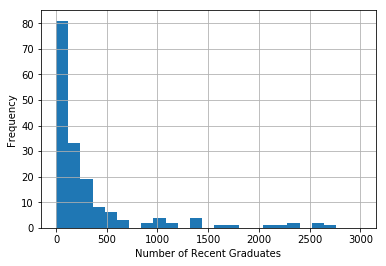

In [36]:
rg = recent_grads['Sample_size'].hist(bins=25, range = (0,3000))
rg.set_xlabel('Number of Recent Graduates')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

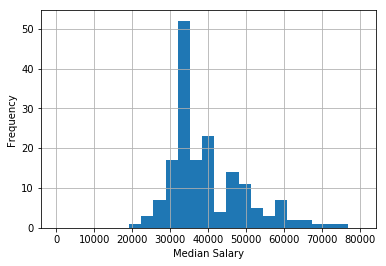

In [19]:
rg = recent_grads['Median'].hist(bins=25, range = (0,80000))
rg.set_xlabel('Median Salary')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

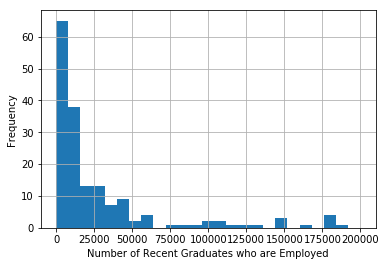

In [20]:
rg = recent_grads['Employed'].hist(bins=25, range = (0,200000))
rg.set_xlabel('Number of Recent Graduates who are Employed')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

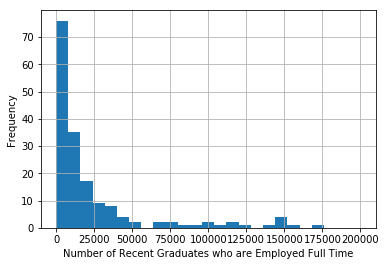

In [22]:
rg = recent_grads['Full_time'].hist(bins=25, range = (0,200000))
rg.set_xlabel('Number of Recent Graduates who are Employed Full Time')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

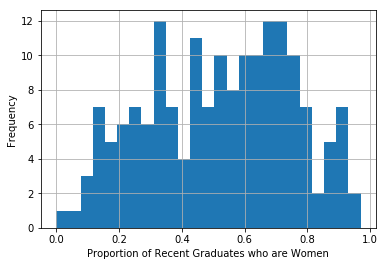

In [23]:
rg = recent_grads['ShareWomen'].hist(bins=25)
rg.set_xlabel('Proportion of Recent Graduates who are Women')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

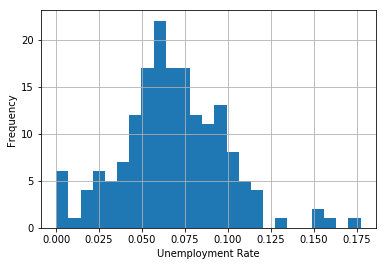

In [24]:
rg = recent_grads['Unemployment_rate'].hist(bins=25)
rg.set_xlabel('Unemployment Rate')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

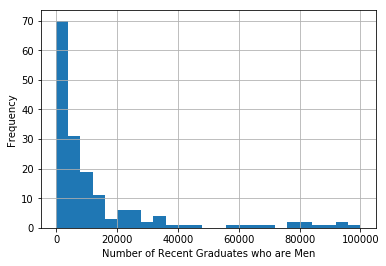

In [25]:
rg = recent_grads['Men'].hist(bins=25, range = (0,100000))
rg.set_xlabel('Number of Recent Graduates who are Men')
rg.set_ylabel('Frequency')

Text(0,0.5,u'Frequency')

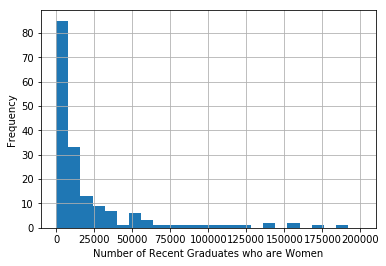

In [26]:
rg = recent_grads['Women'].hist(bins=25, range = (0,200000))
rg.set_xlabel('Number of Recent Graduates who are Women')
rg.set_ylabel('Frequency')

## Scatter Matrix

We can make a cool little matrix plot that has the histograms of two variables and their requisite scatter plots. Lets give that a look.

/Users/dylanwiwad/PycharmProjects/Earnings-by-major/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1131b4b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1132f7c90>]], dtype=object)

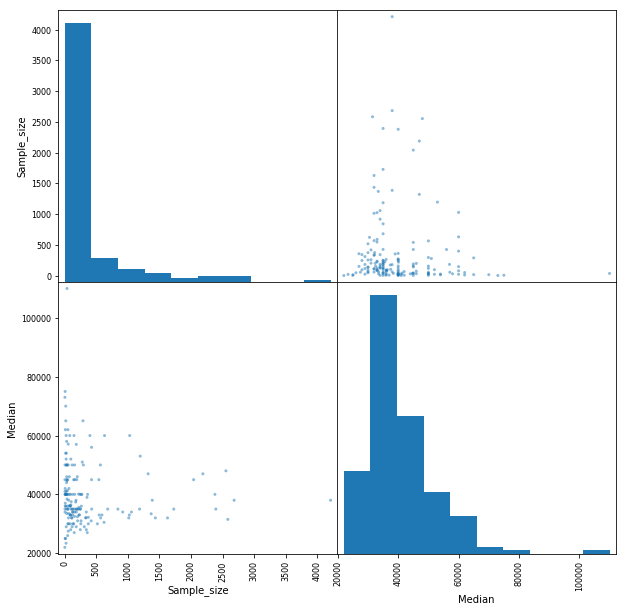

In [27]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

/Users/dylanwiwad/PycharmProjects/Earnings-by-major/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1134122d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113a06490>]], dtype=object)

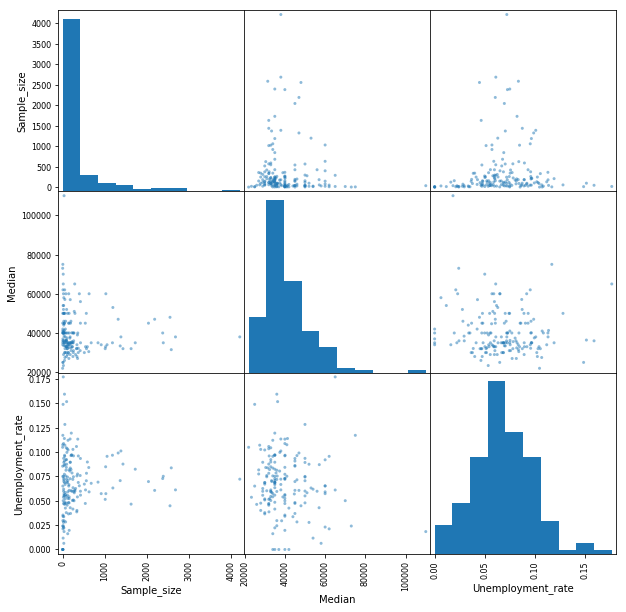

In [28]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10,10))

## Just a Couple Barplots

Going to get some barplots for the share of women in the 10 highest, and 10 lowest, paying majors.

(0, 1.0)

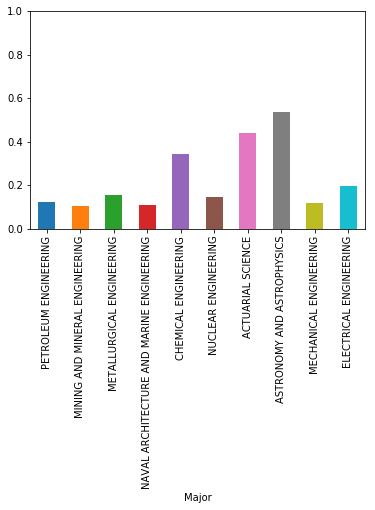

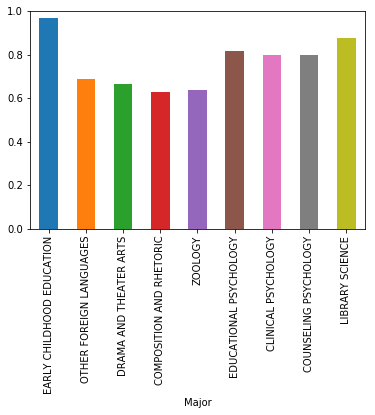

In [44]:
# Share of women in the top ten highest and lowest paying majors
high = recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
high.set_ylim([0,1.0])
low = recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)
low.set_ylim([0,1.0])

These two plots make it very easy to see that the proportion of women is far higher in the lowest paying professions than it is in the highest paying professions. The y axes are not equivalent, but this pattern is still clear. What about the unemployment rates?

(0, 0.2)

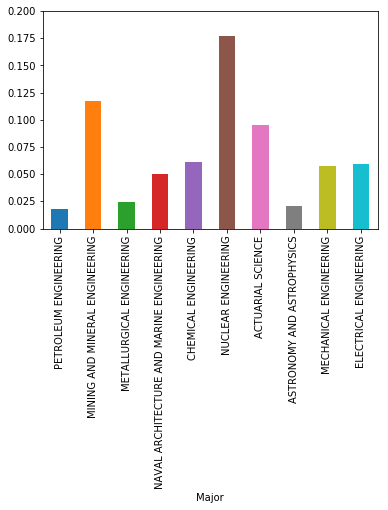

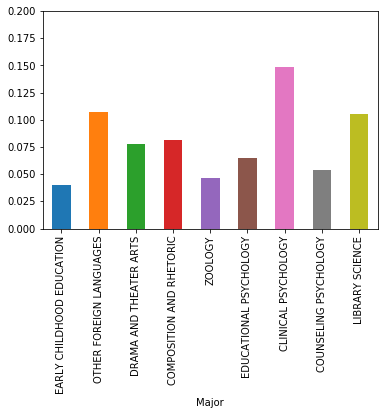

In [47]:
# Unemployment rate in the top ten highest, and lowest, paying majors
high = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
high.set_ylim([0,.20])
low = recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)
low.set_ylim([0, 0.20]) 

Its a little bit tough to tell but it seems like the unemployment rate is about equivalent for the highest and lowest paying majors.

This is all I'm going to do for now - this was a very basic little set of fiddling around with data visualization.